In [ ]:
# https://coolors.co/fc9f5b-fbd1a2-ece4b7-7dcfb6-33ca7f

In [2]:
pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 2.7 MB/s eta 0:00:00


# Data acquisition and alignment

## Load Disease incidence

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn.hmm import PoissonHMM
from hmmlearn.hmm import GaussianHMM
import scipy
from scipy.signal import find_peaks


In [6]:
#loading csv
df = pd.read_csv("/content/filtered_data_PAHO_1770330543785.csv")


In [7]:
df

,adm_0_name,adm_1_name,adm_2_name,full_name,ISO_A0,FAO_GAUL_code,RNE_iso_code,IBGE_code,calendar_start_date,calendar_end_date,Year,dengue_total,case_definition_standardised,S_res,T_res,UUID,region
0,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1998-10-01,1998-10-31,1998,166,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
1,BRAZIL,AMAPA,NaN,"BRAZIL, AMAPA",BRA,667,BR-AP,NaN,1998-09-01,1998-09-30,1998,161,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
2,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1996-06-01,1996-06-30,1996,136,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
3,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1996-07-01,1996-07-31,1996,39,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
4,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1996-08-01,1996-08-31,1996,23,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,MEXICO,GUANAJUATO,NaN,"MEXICO, GUANAJUATO",MEX,1006352,MX-GUA,NaN,2018-11-11,2018-11-17,2018,4,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO
19444,MEXICO,GUERRERO,NaN,"MEXICO, GUERRERO",MEX,1006353,MX-GRO,NaN,2018-11-11,2018-11-17,2018,46,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO
19445,MEXICO,NAYARIT,NaN,"MEXICO, NAYARIT",MEX,1006368,MX-NAY,NaN,2018-11-11,2018-11-17,2018,128,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO
19446,MEXICO,MEXICO,NaN,"MEXICO, MEXICO",MEX,1006355,MX-MEX,NaN,2018-11-11,2018-11-17,2018,8,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO


In [8]:
df.columns

Index(['adm_0_name', 'adm_1_name', 'adm_2_name', 'full_name', 'ISO_A0',
       'FAO_GAUL_code', 'RNE_iso_code', 'IBGE_code', 'calendar_start_date',
       'calendar_end_date', 'Year', 'dengue_total',
       'case_definition_standardised', 'S_res', 'T_res', 'UUID', 'region'],
      dtype='object')

In [ ]:
#loading csv just mexico
df2 = pd.read_csv("/content/filtered_data_PAHO_1770331229823.csv")
df2["T_res"].unique()

In [9]:
#filter countries

mexico = df[
    (df["adm_0_name"] == "MEXICO")&
    (df["T_res"] == "Week") &
    (df["S_res"] == "Admin1")
]
#parse dates
mexico["Date"] = pd.to_datetime(mexico["calendar_start_date"])

brazil = df[
    (df["adm_0_name"] == "BRAZIL")&
    (df["T_res"] == "Month") &
    (df["S_res"] == "Admin1")
]
#parse dates
brazil["Date"] = pd.to_datetime(brazil["calendar_start_date"])

len(brazil)

/tmp/ipython-input-1982196512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico["Date"] = pd.to_datetime(mexico["calendar_start_date"])
/tmp/ipython-input-1982196512.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil["Date"] = pd.to_datetime(brazil["calendar_start_date"])


719

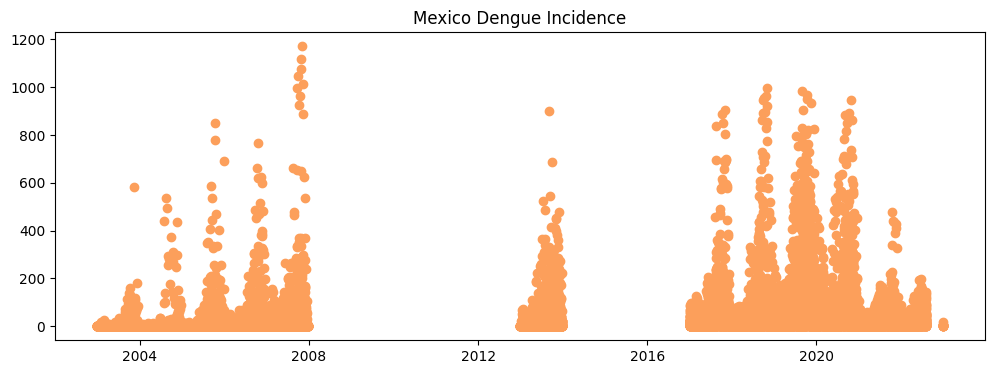

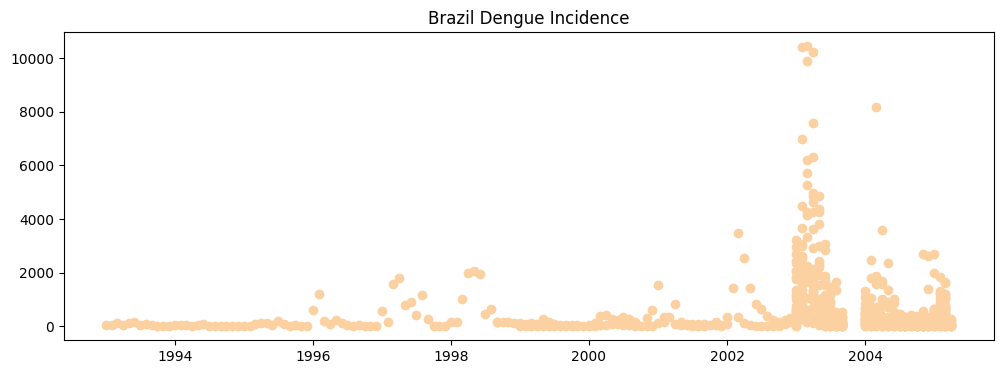

In [10]:
plt.figure(figsize=(12,4))
plt.scatter(mexico["Date"], mexico["dengue_total"], color = "#FC9F5B")
plt.title("Mexico Dengue Incidence")
plt.show()

plt.figure(figsize=(12,4))
plt.scatter(brazil["Date"], brazil["dengue_total"], color = "#FBD1A2")
plt.title("Brazil Dengue Incidence")
plt.show()



so theres a problem mexico isnt continuous.

<Axes: >

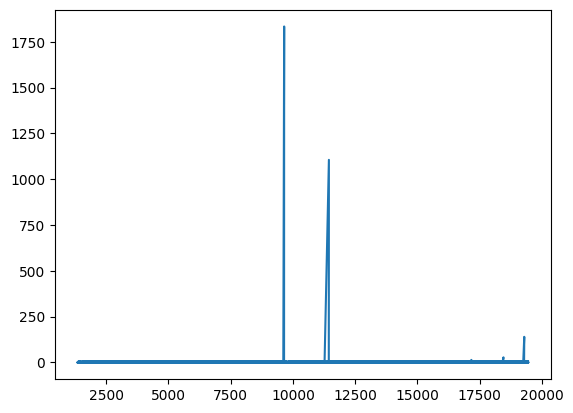

In [11]:
mexico = mexico.sort_values("Date")

mexico["gap"] = mexico["Date"].diff().dt.days

#weekly data should have a gap of 7 days. anything greater will break
mexico["gap"].plot()
#spikes are where gaps exist
# the first cluster seems to be the longest so lets  take that



In [12]:
#identify breaks
mexico["break"] = mexico["gap"] > 14

#assign segment ids
mexico["segment"] = mexico["break"].cumsum()

#find the lognest segment
segment_sizes = mexico.groupby("segment").size()
longest_segment = segment_sizes.idxmax()

#filter dataset
mexico_clean = mexico[
    mexico["segment"] == longest_segment
]
len(mexico_clean)
#8315 is a larrge number because multiple states arent aggregated but produce rows again and again

8315

mexico number of weeks: 261


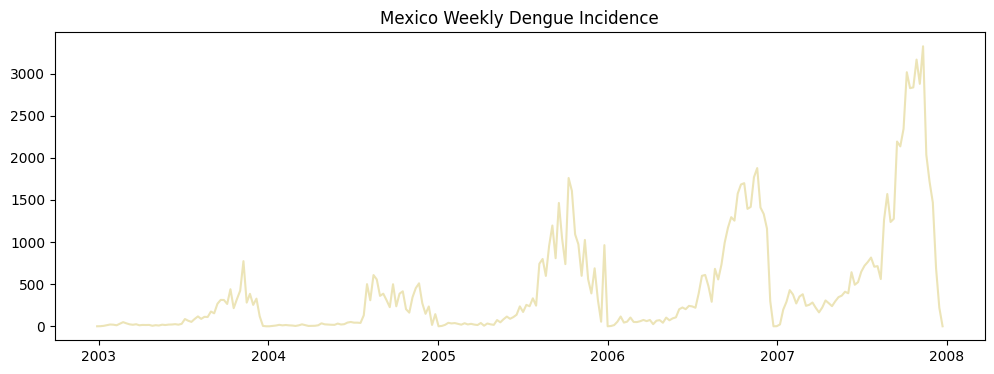

brazil number of months: 145


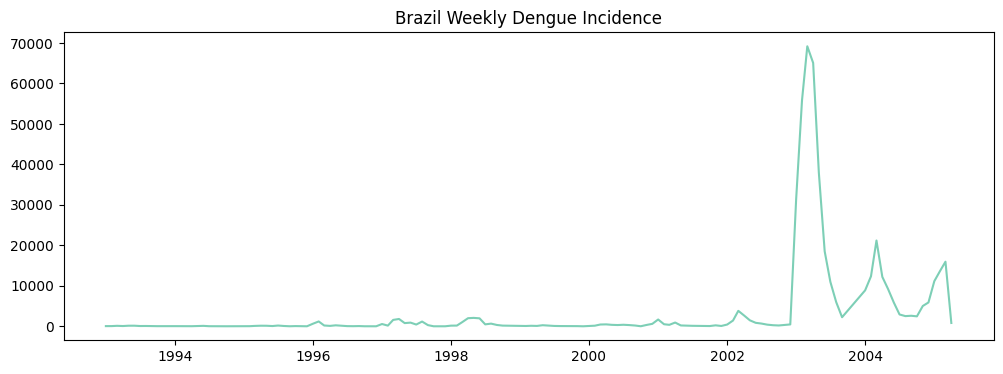

In [13]:
#national aggregation
mexico_nat = (
    mexico_clean
    .groupby("Date")["dengue_total"]
    .sum()
    .reset_index()
)
print("mexico number of weeks:", len(mexico_nat))

#261 weeks around 5 years

plt.figure(figsize=(12,4))
plt.plot(mexico_nat["Date"],
         mexico_nat["dengue_total"], color = "#ECE4B7")

plt.title("Mexico Weekly Dengue Incidence")
plt.show()

#national aggregation
brazil_nat = (
    brazil
    .groupby("Date")["dengue_total"]
    .sum()
    .reset_index()
)
print("brazil number of months:", len(brazil_nat))

#261 weeks around 5 years

plt.figure(figsize=(12,4))
plt.plot(brazil_nat["Date"],
         brazil_nat["dengue_total"], color = "#7DCFB6")
plt.title("Brazil Weekly Dengue Incidence")
plt.show()




## Load Climate Data

In [14]:
print(brazil_nat["Date"][0])
print(brazil_nat["Date"][144])

1993-01-01 00:00:00
2005-04-01 00:00:00


preprocessing temperature

        Date        T2M
0 2002-12-29  14.623643
1 2002-12-30  14.806500
2 2002-12-31  11.932286
3 2003-01-01  13.694286
4 2003-01-02  10.754500
           Date        T2M
1816 2007-12-19  16.679929
1817 2007-12-20  16.412929
1818 2007-12-21  16.590429
1819 2007-12-22  15.333643
1820 2007-12-23  10.913714
1821


/tmp/ipython-input-3609180866.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_temp["T2M"].replace(-999, pd.NA, inplace=True)
/tmp/ipython-input-3609180866.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

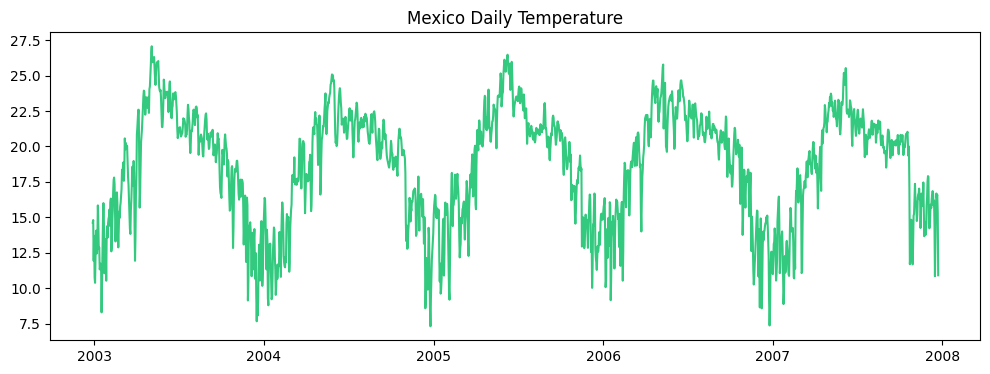

In [15]:
#skip header rows
df1 = pd.read_csv("/content/POWER_Regional_Daily_20021229_20031229.csv", skiprows=9)

#convert year + DOY to date
df1["Date"] = pd.to_datetime(
    df1["YEAR"].astype(str) + "-" + df1["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df1_daily = (
    df1.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

#skip header rows
df2 = pd.read_csv("/content/POWER_Regional_Daily_20031229_20041228.csv", skiprows=9)

#convert year + DOY to date
df2["Date"] = pd.to_datetime(
    df2["YEAR"].astype(str) + "-" + df2["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df2_daily = (
    df2.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df3 = pd.read_csv("/content/POWER_Regional_Daily_20041228_20051228.csv", skiprows=9)

#convert year + DOY to date
df3["Date"] = pd.to_datetime(
    df3["YEAR"].astype(str) + "-" + df3["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df3_daily = (
    df3.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df4 = pd.read_csv("/content/POWER_Regional_Daily_20051228_20061228.csv", skiprows=9)

#convert year + DOY to date
df4["Date"] = pd.to_datetime(
    df4["YEAR"].astype(str) + "-" + df4["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df4_daily = (
    df4.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df5 = pd.read_csv("/content/POWER_Regional_Daily_20061228_20071223.csv", skiprows=9)

#convert year + DOY to date
df5["Date"] = pd.to_datetime(
    df5["YEAR"].astype(str) + "-" + df5["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df5_daily = (
    df5.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

mexico_temp = pd.concat([
    df1_daily,
    df2_daily,
    df3_daily,
    df4_daily,
    df5_daily
])

#remove overlapping dates
mexico_temp = mexico_temp.drop_duplicates("Date")

#sort chronologically
mexico_temp = mexico_temp.sort_values("Date")
mexico_temp = mexico_temp.reset_index(drop=True)

print(mexico_temp.head())
print(mexico_temp.tail())
print(len(mexico_temp))


#since nasa encodes the missing data as -999
mexico_temp["T2M"].replace(-999, pd.NA, inplace=True)
mexico_temp["T2M"].interpolate(inplace=True)



plt.figure(figsize=(12,4))
plt.plot(mexico_temp["Date"], mexico_temp["T2M"], color = '#33CA7F')
plt.title("Mexico Daily Temperature")
plt.show()



preprocessing humidity

        Date       RH2M
0 2002-12-29  70.761357
1 2002-12-30  63.562214
2 2002-12-31  45.126786
3 2003-01-01  44.366214
4 2003-01-02  48.118929
           Date       RH2M
1816 2007-12-19  51.829357
1817 2007-12-20  43.315786
1818 2007-12-21  45.592214
1819 2007-12-22  42.551143
1820 2007-12-23  46.812143
1821


/tmp/ipython-input-1101823976.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_humidity["RH2M"].replace(-999, pd.NA, inplace=True)
/tmp/ipython-input-1101823976.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

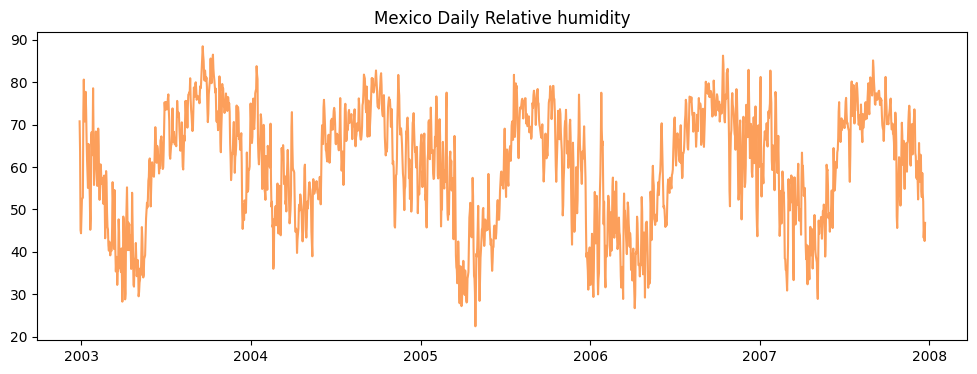

In [16]:
#skip header rows
df1 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20021229_20031229.csv", skiprows=9)

#convert year + DOY to date
df1["Date"] = pd.to_datetime(
    df1["YEAR"].astype(str) + "-" + df1["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df1_daily = (
    df1.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

#skip header rows
df2 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20031229_20041228.csv", skiprows=9)

#convert year + DOY to date
df2["Date"] = pd.to_datetime(
    df2["YEAR"].astype(str) + "-" + df2["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df2_daily = (
    df2.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df3 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20041228_20051228.csv", skiprows=9)

#convert year + DOY to date
df3["Date"] = pd.to_datetime(
    df3["YEAR"].astype(str) + "-" + df3["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df3_daily = (
    df3.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df4 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20051228_20061228.csv", skiprows=9)

#convert year + DOY to date
df4["Date"] = pd.to_datetime(
    df4["YEAR"].astype(str) + "-" + df4["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df4_daily = (
    df4.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df5 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20061228_20071223.csv", skiprows=9)

#convert year + DOY to date
df5["Date"] = pd.to_datetime(
    df5["YEAR"].astype(str) + "-" + df5["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df5_daily = (
    df5.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

mexico_humidity = pd.concat([
    df1_daily,
    df2_daily,
    df3_daily,
    df4_daily,
    df5_daily
])

#remove overlapping dates
mexico_humidity = mexico_humidity.drop_duplicates("Date")

#sort chronologically
mexico_humidity = mexico_humidity.sort_values("Date")
mexico_humidity = mexico_humidity.reset_index(drop=True)

print(mexico_humidity.head())
print(mexico_humidity.tail())
print(len(mexico_humidity))


#since nasa encodes the missing data as -999
mexico_humidity["RH2M"].replace(-999, pd.NA, inplace=True)
mexico_humidity["RH2M"].interpolate(inplace=True)



plt.figure(figsize=(12,4))
plt.plot(mexico_humidity["Date"], mexico_humidity["RH2M"], color = '#FC9F5B')
plt.title("Mexico Daily Relative humidity")
plt.show()



        Date  PRECTOTCORR
0 2002-12-29     0.532786
1 2002-12-30     0.001286
2 2002-12-31     0.002286
3 2003-01-01     0.000714
4 2003-01-02     0.000500
           Date  PRECTOTCORR
1816 2007-12-19     0.016429
1817 2007-12-20     0.000000
1818 2007-12-21     0.000000
1819 2007-12-22     0.000000
1820 2007-12-23     0.152571
1821


/tmp/ipython-input-3398592315.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_prec["PRECTOTCORR"].replace(-999, pd.NA, inplace=True)
/tmp/ipython-input-3398592315.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

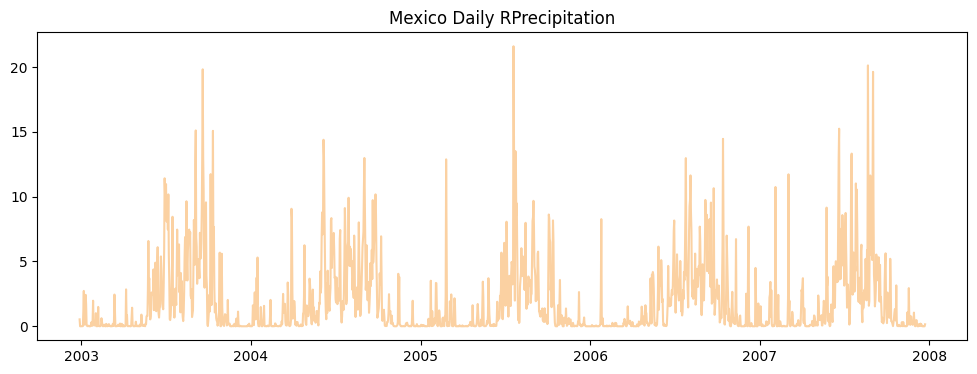

In [19]:
#skip header rows
df1 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20021229_20031229.csv", skiprows=9)

#convert year + DOY to date
df1["Date"] = pd.to_datetime(
    df1["YEAR"].astype(str) + "-" + df1["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df1_daily = (
    df1.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

#skip header rows
df2 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20031229_20041228.csv", skiprows=9)

#convert year + DOY to date
df2["Date"] = pd.to_datetime(
    df2["YEAR"].astype(str) + "-" + df2["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df2_daily = (
    df2.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df3 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20041228_20051228.csv", skiprows=9)

#convert year + DOY to date
df3["Date"] = pd.to_datetime(
    df3["YEAR"].astype(str) + "-" + df3["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df3_daily = (
    df3.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df4 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20051228_20061228.csv", skiprows=9)

#convert year + DOY to date
df4["Date"] = pd.to_datetime(
    df4["YEAR"].astype(str) + "-" + df4["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df4_daily = (
    df4.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df5 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20061228_20071223.csv", skiprows=9)

#convert year + DOY to date
df5["Date"] = pd.to_datetime(
    df5["YEAR"].astype(str) + "-" + df5["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df5_daily = (
    df5.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

mexico_prec = pd.concat([
    df1_daily,
    df2_daily,
    df3_daily,
    df4_daily,
    df5_daily
])

#remove overlapping dates
mexico_prec = mexico_prec.drop_duplicates("Date")

#sort chronologically
mexico_prec = mexico_prec.sort_values("Date")
mexico_prec = mexico_prec.reset_index(drop=True)

print(mexico_prec.head())
print(mexico_prec.tail())
print(len(mexico_prec))


#since nasa encodes the missing data as -999
mexico_prec["PRECTOTCORR"].replace(-999, pd.NA, inplace=True)
mexico_prec["PRECTOTCORR"].interpolate(inplace=True)



plt.figure(figsize=(12,4))
plt.plot(mexico_prec["Date"], mexico_prec["PRECTOTCORR"], color = '#FBD1A2')
plt.title("Mexico Daily RPrecipitation")
plt.show()



In [20]:
#merge all climate variables
mexico_climate = (
    mexico_temp
    .merge(mexico_prec, on="Date")
    .merge(mexico_humidity, on="Date")
)
#renaming columns
mexico_climate.columns = [
    "Date",
    "Temp",
    "Rain",
    "Humidity"
]

#weekly aggregation. data is daily
mexico_weekly = (
    mexico_climate
    .set_index("Date")
    .resample("W")
    .agg({
        "Temp": "mean",
        "Rain": "sum",
        "Humidity": "mean"
    })
    .reset_index()
)

mexico_weekly.head(6)

,Date,Temp,Rain,Humidity
0,2002-12-29,14.623643,0.532786,70.761357
1,2003-01-05,12.531194,0.013500,51.275153
2,2003-01-12,13.744255,8.793357,74.309378
3,2003-01-19,11.065092,0.243643,60.365786
4,2003-01-26,13.454888,1.014214,58.606122
5,2003-02-02,13.813316,3.542929,65.013510


brazil

Index(['YEAR', 'LAT', 'LON', 'Month', 'Temp'], dtype='object')
   YEAR   LAT     LON  Month   Temp       Date
0  1993 -10.0 -46.250      1  23.82 1993-01-01
1  1993 -10.0 -46.875      1  24.81 1993-01-01
2  1993 -10.0 -47.500      1  25.24 1993-01-01
3  1993 -10.0 -48.125      1  25.04 1993-01-01
4  1993 -10.0 -48.750      1  25.04 1993-01-01
5  1993 -10.0 -49.375      1  25.57 1993-01-01


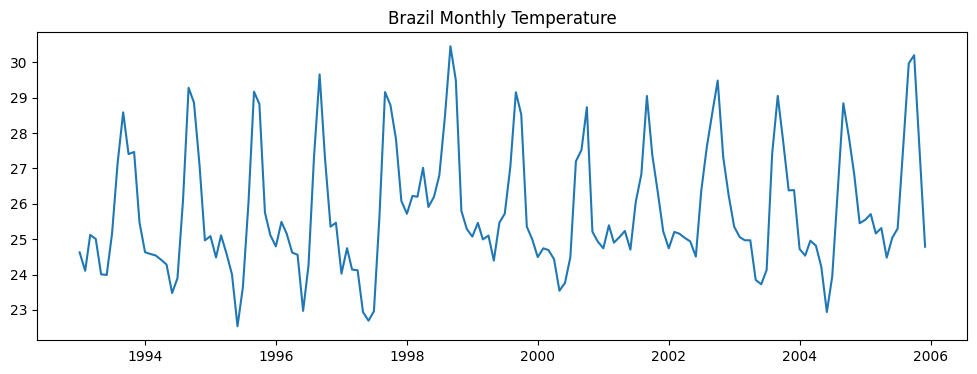

In [ ]:
#skip header rows same as mexico
df = pd.read_csv("/content/brazil/temperature/POWER_Regional_Monthly_1993_2005.csv", skiprows=9)
df = df.drop(columns=["PARAMETER","ANN"])


#we reshape jan-dec into one column
df_melt = df.melt(
    id_vars=["YEAR", "LAT", "LON"],
    value_vars=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    var_name="Month",
    value_name="Temp"
)
print(df_melt.columns)

#convert month text to number
month_map = {
    "JAN":1,"FEB":2,"MAR":3,"APR":4,
    "MAY":5,"JUN":6,"JUL":7,"AUG":8,
    "SEP":9,"OCT":10,"NOV":11,"DEC":12
}

df_melt["Month"] = df_melt["Month"].map(month_map)


#create date column
df_melt["Date"] = pd.to_datetime(
    dict(
        year=df_melt["YEAR"],
        month=df_melt["Month"],
        day=1
    )
)

#we use day = 1 due to monthly resolution

#spatial averaging same as mexico
brazil_temp = (
    df_melt.groupby("Date")["Temp"]
    .mean()
    .reset_index()
)
print(df_melt.head(6))

plt.figure(figsize=(12,4))
plt.plot(brazil_temp["Date"], brazil_temp["Temp"])
plt.title("Brazil Monthly Temperature")
plt.show()



Index(['YEAR', 'LAT', 'LON', 'Month', 'Humidity'], dtype='object')
   YEAR   LAT     LON  Month  Humidity       Date
0  1993 -10.0 -46.250      1     78.08 1993-01-01
1  1993 -10.0 -46.875      1     77.56 1993-01-01
2  1993 -10.0 -47.500      1     78.34 1993-01-01
3  1993 -10.0 -48.125      1     78.98 1993-01-01
4  1993 -10.0 -48.750      1     79.56 1993-01-01
5  1993 -10.0 -49.375      1     81.12 1993-01-01


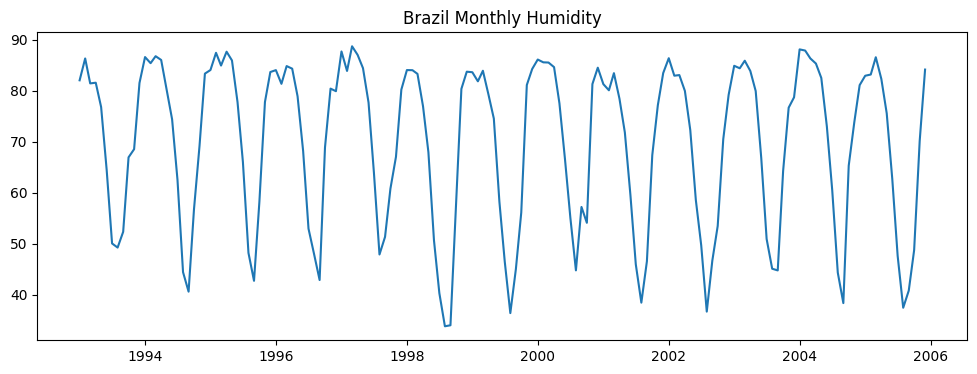

In [ ]:
#skip header rows same as mexico
df = pd.read_csv("/content/brazil/humidity/POWER_Regional_Monthly_1993_2005.csv", skiprows=9)
df = df.drop(columns=["PARAMETER","ANN"])


#we reshape jan-dec into one column
df_melt = df.melt(
    id_vars=["YEAR", "LAT", "LON"],
    value_vars=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    var_name="Month",
    value_name="Humidity"
)
print(df_melt.columns)

#convert month text to number
month_map = {
    "JAN":1,"FEB":2,"MAR":3,"APR":4,
    "MAY":5,"JUN":6,"JUL":7,"AUG":8,
    "SEP":9,"OCT":10,"NOV":11,"DEC":12
}

df_melt["Month"] = df_melt["Month"].map(month_map)


#create date column
df_melt["Date"] = pd.to_datetime(
    dict(
        year=df_melt["YEAR"],
        month=df_melt["Month"],
        day=1
    )
)

#we use day = 1 due to monthly resolution

#spatial averaging same as mexico
brazil_humidity = (
    df_melt.groupby("Date")["Humidity"]
    .mean()
    .reset_index()
)
print(df_melt.head(6))

plt.figure(figsize=(12,4))
plt.plot(brazil_humidity["Date"], brazil_humidity["Humidity"])
plt.title("Brazil Monthly Humidity")
plt.show()


Index(['YEAR', 'LAT', 'LON', 'Month', 'Precipitation'], dtype='object')
   YEAR   LAT     LON  Month  Precipitation       Date
0  1993 -10.0 -46.250      1         164.28 1993-01-01
1  1993 -10.0 -46.875      1         184.96 1993-01-01
2  1993 -10.0 -47.500      1         179.78 1993-01-01
3  1993 -10.0 -48.125      1         137.80 1993-01-01
4  1993 -10.0 -48.750      1         139.03 1993-01-01
5  1993 -10.0 -49.375      1         143.30 1993-01-01


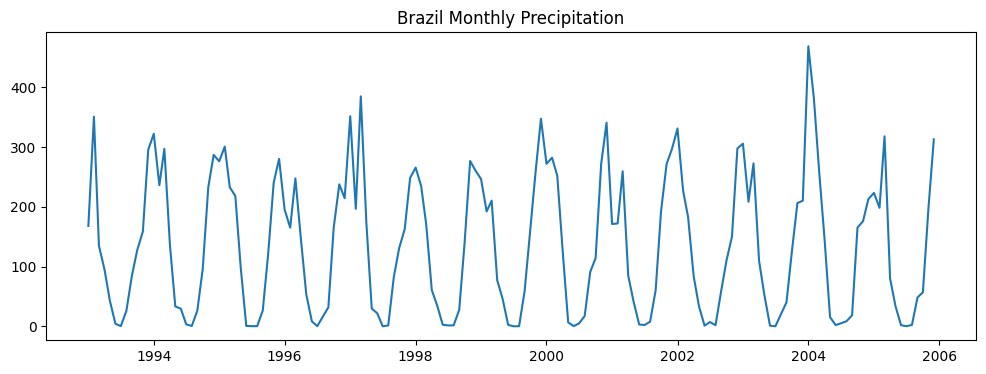

In [ ]:
#skip header rows same as mexico
df = pd.read_csv("/content/brazil/precipitation/POWER_Regional_Monthly_1993_2005.csv", skiprows=9)

df = df.drop(columns=["PARAMETER","ANN"])


#we reshape jan-dec into one column
df_melt = df.melt(
    id_vars=["YEAR", "LAT", "LON"],
    value_vars=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    var_name="Month",
    value_name="Precipitation"
)
print(df_melt.columns)

#convert month text to number
month_map = {
    "JAN":1,"FEB":2,"MAR":3,"APR":4,
    "MAY":5,"JUN":6,"JUL":7,"AUG":8,
    "SEP":9,"OCT":10,"NOV":11,"DEC":12
}

df_melt["Month"] = df_melt["Month"].map(month_map)


#create date column
df_melt["Date"] = pd.to_datetime(
    dict(
        year=df_melt["YEAR"],
        month=df_melt["Month"],
        day=1
    )
)

#we use day = 1 due to monthly resolution

#spatial averaging same as mexico
brazil_prec = (
    df_melt.groupby("Date")["Precipitation"]
    .mean()
    .reset_index()
)
print(df_melt.head(6))

plt.figure(figsize=(12,4))
plt.plot(brazil_prec["Date"], brazil_prec["Precipitation"])
plt.title("Brazil Monthly Precipitation")
plt.show()


In [ ]:
brazil_climate = (
    brazil_temp
    .merge(brazil_prec, on="Date")
    .merge(brazil_humidity, on="Date")
)

brazil_climate.head()
brazil_climate.tail()
len(brazil_climate)


156

In [ ]:
#brazil dengue cases are only uptil april so we need to remove info for the rest of the year
brazil_climate = brazil_climate[
    (brazil_climate["Date"] >= "1993-01-01") &
    (brazil_climate["Date"] <= "2005-04-01")
]

# just checking if the final bounds are matching
print(
    brazil_nat["Date"].min(),
    brazil_nat["Date"].max()
)

print(
    brazil_climate["Date"].min(),
    brazil_climate["Date"].max()
)



1993-01-01 00:00:00 2005-04-01 00:00:00
1993-01-01 00:00:00 2005-04-01 00:00:00


## Align temporal resolution
after both climate and dengue cases have the same frequency we merge them together

In [21]:
print(mexico_nat["Date"].head())
print(mexico_weekly["Date"].head())


#merge incidence and climate
mexico_merged = (
    mexico_nat
    .merge(
        mexico_weekly,
        on="Date",
        how="inner" #we only want weeks where both exists, outer joins would create Nans. inner ensures algined time windows
    )
)

print(mexico_merged.head(6))
print(len(mexico_nat))
print(len(mexico_weekly))
print(len(mexico_merged))
mexico_merged.isna().sum() # should be 0




0   2002-12-29
1   2003-01-05
2   2003-01-12
3   2003-01-19
4   2003-01-26
Name: Date, dtype: datetime64[ns]
0   2002-12-29
1   2003-01-05
2   2003-01-12
3   2003-01-19
4   2003-01-26
Name: Date, dtype: datetime64[ns]
        Date  dengue_total       Temp      Rain   Humidity
0 2002-12-29             0  14.623643  0.532786  70.761357
1 2003-01-05             1  12.531194  0.013500  51.275153
2 2003-01-12             5  13.744255  8.793357  74.309378
3 2003-01-19            13  11.065092  0.243643  60.365786
4 2003-01-26            21  13.454888  1.014214  58.606122
5 2003-02-02            19  13.813316  3.542929  65.013510
261
261
261


,0
Date,0
dengue_total,0
Temp,0
Rain,0
Humidity,0


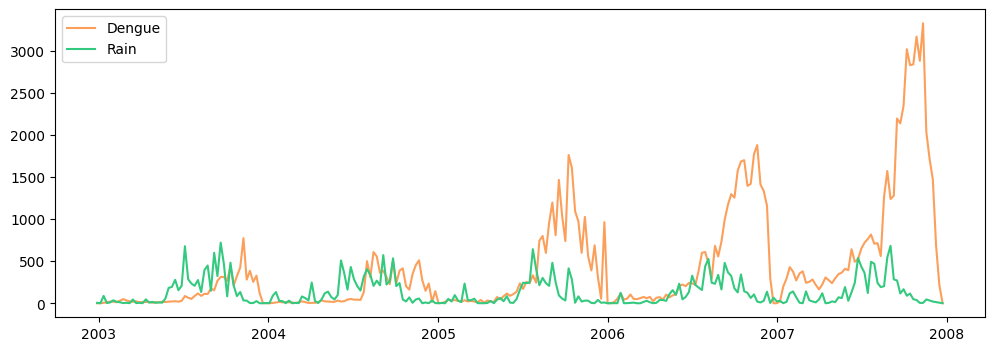

In [22]:

plt.figure(figsize=(12,4))
plt.plot(mexico_merged["Date"],
         mexico_merged["dengue_total"], color = "#FC9F5B",
         label="Dengue")

plt.plot(mexico_merged["Date"],
         10*mexico_merged["Rain"], color = "#33CA7F",
         label="Rain")

plt.legend()
plt.show()

#you notice how rain peeks precede outbreaks and there is seasonal co mevement


brazil merge

In [ ]:
brazil_merged = brazil_nat.merge(
    brazil_climate,
    on="Date",
    how="inner"
)


# Labelers

## Labeler 1 - Labeler 1 (renewal / R_t proxy)
Label 1 detects and early signal.

You have weekly incidence $I_t$. The renewal approximation says:

$I_t \approx R_t \sum_{k=1}^{K} w_k\, I_{t-k}$

So:

$R_t \approx \frac{I_t}{\sum_{k=1}^{K} w_k\, I_{t-k}}$

w_k are generation interval weights (they sum to 1)
 and K is the max lag in weeks you consider

Interpretation: numerator = current incidence and
denominator = “infectious pressure” from past incidence (weighted by how likely past cases generate infections now)


or dengue:

Transmission chain is
Human → mosquito → human

But in surveillance data you only see human cases.

For dengue, Mean generation interval ≈ 3-4 weeks. So with weekly data we choose K = 6 weeks as a safe upper bound. We usea discretized Gamma with mean = 3 weeks and std of 1.5 weeks





$R_t \;=\; \frac{I_t + \epsilon}{\sum_{k=1}^{6} w_k \, I_{t-k} + \epsilon}$

we use $\epsilon = 1$ (important for low-incidence weeks) to avoid 0 denominator and Weekly smoothing (2-3 weeks)


In [23]:
def renewal_label(incidence,t, epsilon = 1.0, K=6):
  w = np.asarray([0.10,0.22,0.28,0.22, 0.12,0.06])

  if t < K:
        return np.nan

  numerator = incidence[t] + epsilon
  denominator = epsilon
  for i in range (K):
    denominator += w[i] * incidence[t-(i+1)]

  Rt = numerator/denominator

  return Rt

#computing Rt for all week
mexico_Rt_labels = []
for i in range (6,len(mexico_merged)):
  mexico_Rt_label = renewal_label(np.asarray(mexico_merged['dengue_total']),i)
  mexico_Rt_labels.append(mexico_Rt_label)


#Now each Rt_proxy[t] corresponds to the correct week.
mexico_merged = mexico_merged.iloc[6:].copy()
mexico_merged['Rt_proxy'] = mexico_Rt_labels

mexico_merged['Rt_proxy'].describe()



,Rt_proxy
count,255.000000
mean,1.222643
std,0.870987
min,0.000711
25%,0.737444
50%,1.148410
75%,1.528199
max,9.442141


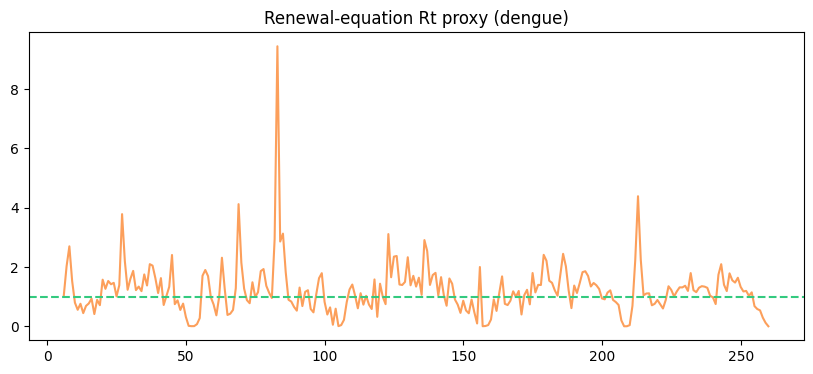

In [24]:

plt.figure(figsize=(10,4))
plt.plot(mexico_merged['Rt_proxy'], color = "#FC9F5B")
plt.axhline(1, color='#33CA7F', linestyle='--')
plt.title("Renewal-equation Rt proxy (dengue)")
plt.show()


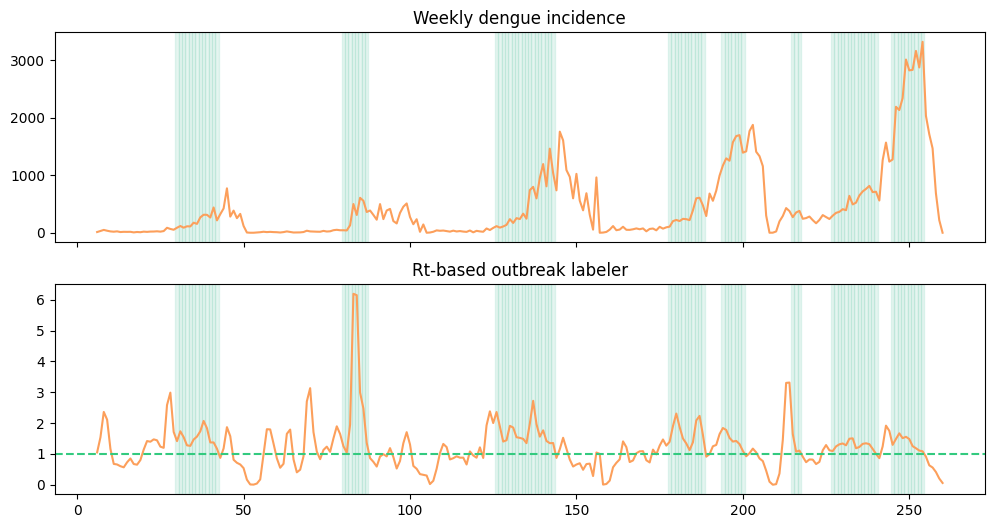

In [45]:
#Smooth the Rt proxy
#Raw Rt is noisy with weekly dengue data. Smooth it before labeling.
# So raw Rt values will spike in one week intervals this is not a true outbreak but it appears to flicker.
#it basically acts as a low pass filter that removes high frequency noise
mexico_merged['Rt_smoothed'] = (
    mexico_merged['Rt_proxy']
    .rolling(window=2, min_periods=1)
    .mean()
)


# considered outbreak if Rt > 1 for two consecuvitve weeks
threshold = 1.0
consec = 4

Imin = 30  # a minimum incidence gate. outbreak will only be labelled when incidence is not tiny. this ignore values that are absolutely small
# I am not sure if 30 is too large and whether we shouldnt neglect these values
above = (mexico_merged['Rt_smoothed'] > threshold).astype(int) &  (mexico_merged['dengue_total'] >= Imin)


mexico_merged['Rt_outbreak'] = (
    above
    .rolling(window=consec)
    .sum()
    .ge(consec)
    .astype(int)
)

fig, ax = plt.subplots(2, 1, figsize=(12,6), sharex=True)

# Incidence
ax[0].plot(mexico_merged['dengue_total'], label='Incidence', color = '#FC9F5B')
for i in mexico_merged.index[mexico_merged['Rt_outbreak'] == 1]:
    ax[0].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)
# ax[0].set_xlim(6,10)
# ax[0].set_ylim(0,100)
ax[0].set_title('Weekly dengue incidence')

# Rt
ax[1].plot(mexico_merged['Rt_smoothed'], label='Rt proxy', color = '#FC9F5B')
ax[1].axhline(1, color='#33CA7F', linestyle='--')

# Shade outbreaks
for i in mexico_merged.index[mexico_merged['Rt_outbreak'] == 1]:
    ax[1].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)

ax[1].set_title('Rt-based outbreak labeler')
plt.show()


#notice the limitation The labeler flags outbreaks with low absolute case numbers. regions that look flat if you zoom in you will see has minor casse increases
#Sensitive to noise in early periods. we tried to fix it through smoothing and persistence rules but still present
# most visual improvement happens when increasing consecutive to 4 but no theoretical justification for this large number
# because then it fires onlywhen smoothing window + consec size - 1 is consistently above 1. ex: 3 + 4 - 1 = 6 weeks of persistence. Clear sustained wave

brazil

In [ ]:
#computing Rt for all week
brazil_Rt_labels = []
K=1
for i in range (K,len(brazil_merged)):
  brazil_Rt_label = renewal_label(np.asarray(brazil_merged['dengue_total']),i, K=K)
  brazil_Rt_labels.append(brazil_Rt_label)


#Now each Rt_proxy[t] corresponds to the correct week.
brazil_merged = brazil_merged.iloc[K:].copy()
brazil_merged['Rt_proxy'] = brazil_Rt_labels

brazil_merged['Rt_proxy'].describe()

,Rt_proxy
count,144.000000
mean,25.858358
std,86.934969
min,0.033898
25%,4.890673
50%,7.641535
75%,15.104341
max,672.012848


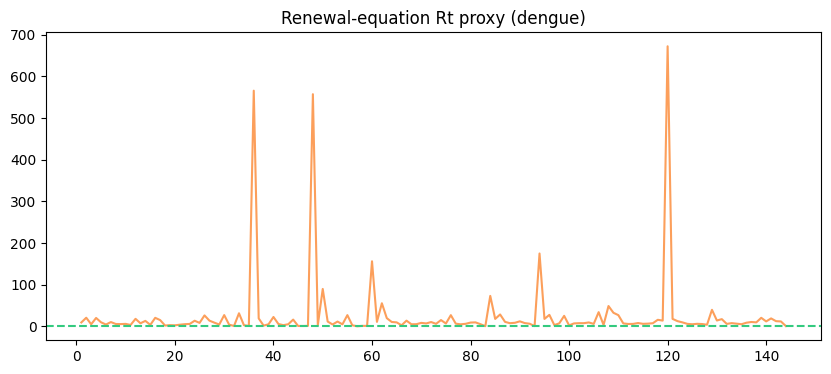

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(brazil_merged['Rt_proxy'], color = "#FC9F5B")
plt.axhline(1, color='#33CA7F', linestyle='--')
plt.title("Renewal-equation Rt proxy (dengue)")
plt.show()

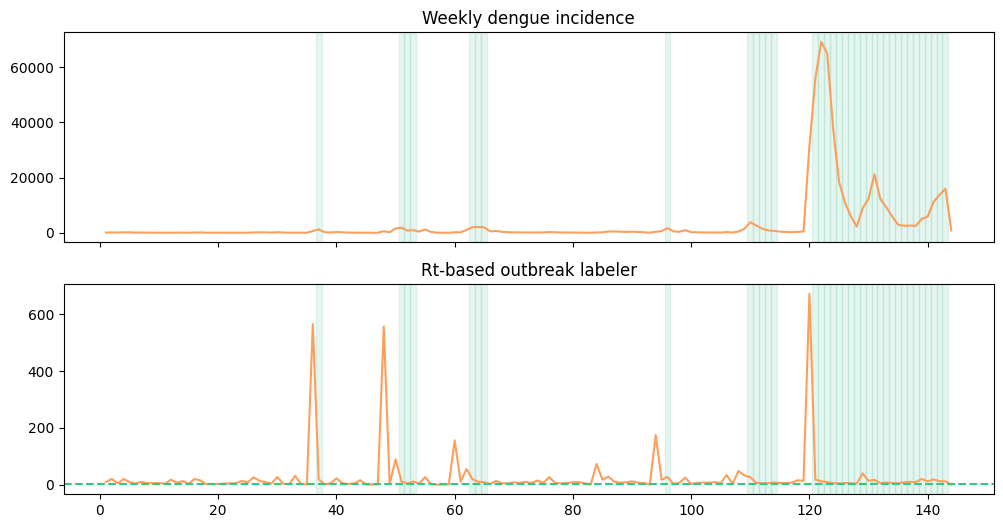

In [ ]:
#Smooth the Rt proxy
#Raw Rt is noisy with weekly dengue data. Smooth it before labeling.
# So raw Rt values will spike in one week intervals this is not a true outbreak but it appears to flicker.
#it basically acts as a low pass filter that removes high frequency noise
brazil_merged['Rt_smoothed'] = (
    brazil_merged['Rt_proxy']
    .rolling(window=1, min_periods=1)
    .mean()
)


# considered outbreak if Rt > 1 for two consecuvitve weeks
threshold = 1
consec =2

Imin = 600  # a minimum incidence gate. outbreak will only be labelled when incidence is not tiny. this ignore values that are absolutely small
# I am not sure if 30 is too large and whether we shouldnt neglect these values
above = (brazil_merged['Rt_smoothed'] > threshold).astype(int) &  (brazil_merged['dengue_total'] >= Imin)


brazil_merged['Rt_outbreak'] = (
    above
    .rolling(window=consec)
    .sum()
    .ge(consec)
    .astype(int)
)

fig, ax = plt.subplots(2, 1, figsize=(12,6), sharex=True)

# Incidence
ax[0].plot(brazil_merged['dengue_total'], label='Incidence', color = '#FC9F5B')
for i in brazil_merged.index[brazil_merged['Rt_outbreak'] == 1]:
    ax[0].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)
# ax[0].set_xlim(6,10)
# ax[0].set_ylim(0,100)
ax[0].set_title('Weekly dengue incidence')

# Rt
ax[1].plot(brazil_merged['Rt_smoothed'], label='Rt proxy', color = '#FC9F5B')
ax[1].axhline(1, color='#33CA7F', linestyle='--')

# Shade outbreaks
for i in brazil_merged.index[brazil_merged['Rt_outbreak'] == 1]:
    ax[1].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)

ax[1].set_title('Rt-based outbreak labeler')
plt.show()


## Labeler 2 — (State-space / HMM / change-point)
 This is a more conservative label that confirms we are in the epidemic region.

This labeler assumes:

There exists a latent state $Z_t$ that changes over time
(e.g. endemic → epidemic → endemic). This is a hidden layer that you never directly observe.

$$Z_t \in \{\text{endemic}, \text{epidemic}\}$$
0 = endemic,
1 = epidemic

This is the observation that you do observe. The observed states are  generated by the hidden states.
$$I_t \mid Z_t \sim \text{Poisson}(\lambda_{Z_t})$$

Transitions:
$$P(Z_t \mid Z_{t-1})$$

The current regime only depends on the previous week's regime.

This is the bayesian change point detection similar to the one described in paper 2 when the state rarely changes.

Regime dynamics:
$$P(Z_t \mid Z_{t-1}) =
\begin{pmatrix}
1-p & p \\
q & 1-q
\end{pmatrix}$$

PoissonHMM means for each state we generate observations from a poisson distribution. HMM stands for hidden markov model.

[[ 43.2]
 [691.8]]
[[0.86363636 0.13636364]
 [0.04787234 0.95212766]]


Text(0.5, 1.0, 'Weekly dengue incidence')

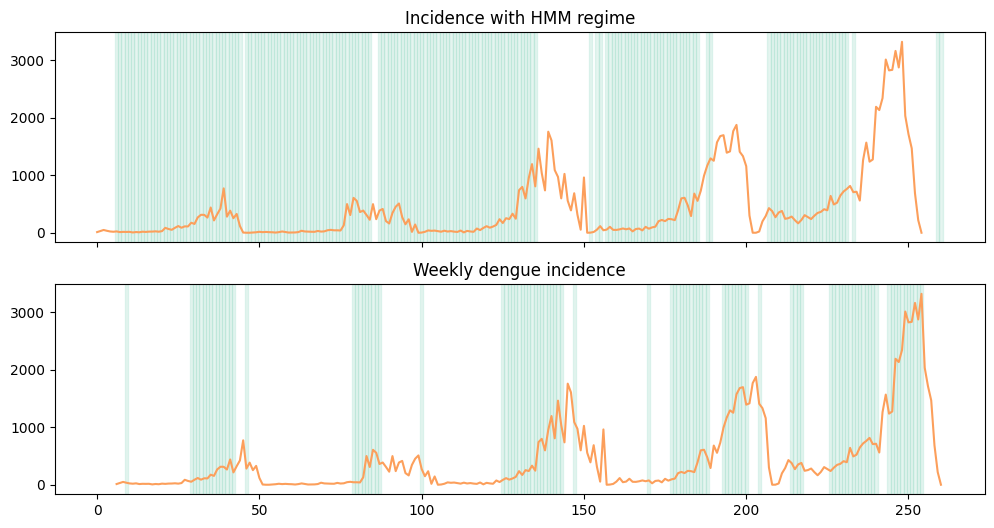

In [26]:
y = np.asarray(mexico_merged['dengue_total']).astype(int)

#a small floor to avoid 0s
y = np.maximum(y, 1)

#define a two state poisson HMM
model = PoissonHMM(
    n_components=2, #number of hidden states
    n_iter=200, #EM iterations as HMM are fit using these.
    tol=1e-4,
    init_params="stmc",  # these are the parameters that are allowed to reinitialise randomly. s = start probabilities of P(Zo), t = transition  matrix, m = emmision means lambda
    verbose=False
)


#Initialisation
low_mean  = np.percentile(y, 30)
high_mean = np.percentile(y, 80)

model.startprob_ = np.array([0.9, 0.1]) #what state do we start in? most of the itme (P=0.9) we start in endemic state

#bayesian change point prior
model.transmat_ = np.array([[0.97, 0.03],
                            [0.05, 0.95]]) #p00 and p11 are hgih cause these states are sticky. transitioning from endemic to epidemic is low becaue outbreaks are low
#poisson means for each state.
model.means_ = np.array([[low_mean],
                          [high_mean]])


#fit the model
model.fit(y.reshape(-1,1))
# this runs the viterbi algorithm (remember you learned it recently in NLP) which finds the most likely sequence of hidden states


#again you get the regimes, which are the hidden states. labels are they endemic or epidemic
Z = model.predict(y.reshape(-1,1))
mexico_merged['HMM_state'] = Z
means = model.means_.flatten() #(n_components, n_features) n_components = 2 = hidden states, n_features = 1 observation = incidence
                                #(lambda0, lambda1) the order doesnt exactly correspond to endemic or epidemic

epidemic_state = np.argmax(means) # so we need to find which index is epidemic. the index witht he larger mean is epidemic
                                  # here the index 1 is higher so that is the epidemic label index

mexico_merged['HMM_outbreak'] = (mexico_merged['HMM_state'] == epidemic_state).astype(int) #all the high means = 1 or True
print(model.means_)
print(model.transmat_)


fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

ax[0].plot(y, color='#FC9F5B')
for i in mexico_merged.index[mexico_merged['HMM_outbreak'] == 1]:
    ax[0].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)
ax[0].set_title("Incidence with HMM regime")

ax[1].plot(mexico_merged['dengue_total'], label='Incidence', color = '#FC9F5B')
for i in mexico_merged.index[mexico_merged['Rt_outbreak'] == 1]:
    ax[1].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)
# ax[0].set_xlim(6,10)
# ax[0].set_ylim(0,100)
ax[1].set_title('Weekly dengue incidence')

# ax[1].plot(mexico_merged['Rt_smoothed'], color='#FC9F5B')
# ax[1].axhline(1, linestyle='--', color='#33CA7F')
# for i in mexico_merged.index[mexico_merged['Rt_outbreak'] == 1]:
#     ax[1].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)
# ax[1].set_title("Rt-based labeler")

# plt.show()



hmmmm that doesnt look right. doesnt match with the rt method at all, labelled points dont seem right and is too broad.

In [27]:
print("Mean:", y.mean())
print("Variance:", y.var())


Mean: 437.37254901960785
Variance: 397749.4259131103


Thats the problem. Variance >> Mean. the system is overdispersed. Poisson is not the right model to use. Each individual case cannot be treated independently. The system has latent heterogeneity. So we have to use a gaussian-on-log method.

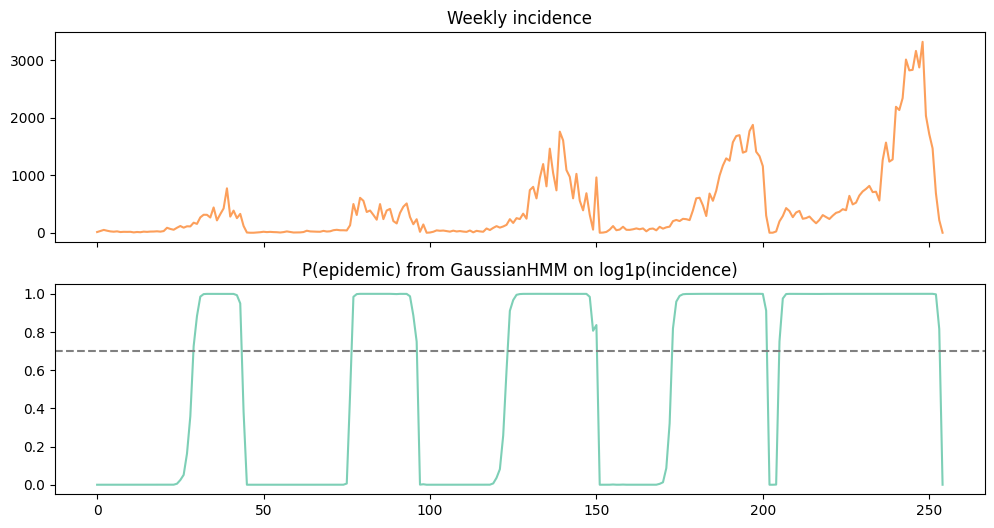

In [58]:

y = np.asarray(mexico_merged['dengue_total']).astype(float)
#build transformed series
y_log = np.log1p(y).reshape(-1, 1)   # shape (T, 1)



model2 = GaussianHMM(
    n_components=2,
    covariance_type="diag",
    n_iter=500,
    tol=1e-4,
    init_params="stmc",
    random_state=0
)

model2.startprob_ = np.array([0.9, 0.1])
model2.transmat_  = np.array([[0.98, 0.02],
                              [0.05, 0.95]])

# Initialize means in log-space (robust)
low_m  = np.percentile(y_log, 30)
high_m = np.percentile(y_log, 80)
model2.means_ = np.array([[low_m],
                          [high_m]])

# Initialize variances (bigger helps absorb noise)
var = np.var(y_log)
model2.covars_ = np.array([[var],
                           [var]])

model2.fit(y_log)

#again labels with higher mean = epidemic

Z = model2.predict(y_log)
means = model2.means_.flatten()
epidemic_state = np.argmax(means)

mexico_merged['HMM2_state'] = Z
mexico_merged['HMM2_outbreak'] = (Z == epidemic_state).astype(int)

# Soft posterior is useful too
post = model2.predict_proba(y_log)
mexico_merged['P_epidemic'] = post[:, epidemic_state] #gives you probability of being in each state. this can give you uncertainities
                                                      # the other just picks the highest value

#using posterior probabilites, we only label it as epidemic above this threshold.
p_thr = 0.7     # tighten from 0.5
consec = 1    # enforce persistence
above = (mexico_merged['P_epidemic'] >= p_thr).astype(int)

mexico_merged['HMM2_outbreak_tight'] = (
    above.rolling(consec).sum().ge(consec).astype(int)
)



fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

ax[0].plot(mexico_merged['dengue_total'].values, color='#FC9F5B')
ax[0].set_title("Weekly incidence")

ax[1].plot(mexico_merged['P_epidemic'].values, color='#7DCFB6')
ax[1].axhline(0.7, linestyle='--', color='gray')
ax[1].set_title("P(epidemic) from GaussianHMM on log1p(incidence)")

plt.show()


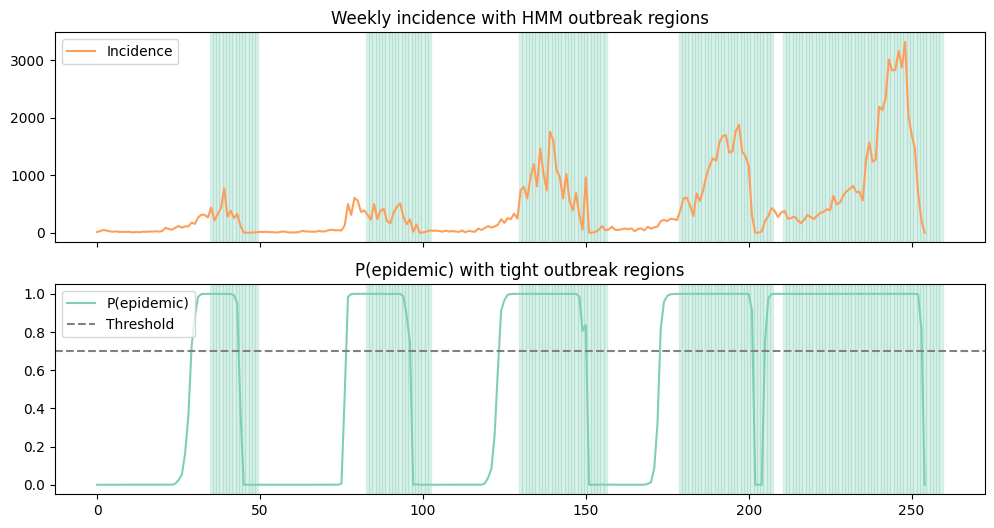

In [59]:
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

# ---- Incidence plot ----
ax[0].plot(
    mexico_merged['dengue_total'].values,
    color='#FC9F5B',
    label='Incidence'
)

for i in mexico_merged.index[mexico_merged['HMM2_outbreak_tight'] == 1]:
    ax[0].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.25)

ax[0].set_title("Weekly incidence with HMM outbreak regions")
ax[0].legend()

# ---- Posterior probability plot ----
ax[1].plot(
    mexico_merged['P_epidemic'].values,
    color='#7DCFB6',
    label='P(epidemic)'
)
ax[1].axhline(p_thr, linestyle='--', color='gray', label='Threshold')

for i in mexico_merged.index[mexico_merged['HMM2_outbreak_tight'] == 1]:
    ax[1].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.25)

ax[1].set_title("P(epidemic) with tight outbreak regions")
ax[1].legend()

plt.show()


## Label 3 - Epidemiological wave detection


1. find all local minima and maxima
2. for each maxima filter using absolute prominence $P_{abs}$, relative prominence $P_{rel}$ and minimum temporal resolution $T_{sep}$.
3. Pair each minimum and next maxima as a wave
4. All times between this minima and maxima is the outbreak




In [30]:
#smooth incidence
#again since its noisy
y = mexico_merged['dengue_total'].values
y_smooth = pd.Series(y).rolling(3, center=True).mean()


#detect candidate peaks
peaks, props = find_peaks( #This is to find Pabs and Tsep
    y_smooth,
    prominence=np.percentile(y_smooth.dropna(), 60),
    distance=6   # weeks, The minimum number of samples between two detected peaks.
                 #If two candidate peaks are closer than distance, only the taller one is kept.
                 #So it enforces temporal separation between peaks
)

#so we know the points where the waves peak. lets find the minimum (trouhg) before that
peak_and_mins = np.zeros((5,2)) #minima and maxima for the 5 peaks, should not hardcode this

for i in range (len(peaks)):
  if i ==0:
    tmin = np.argmin(y_smooth[0:peaks[i]]) #finding the minimum between 0 - 38
    peak_and_mins[i,0] = tmin
    peak_and_mins[i,1] = peaks[i]
  else:
    tmin = np.argmin(y_smooth[peaks[i-1]:peaks[i]])
    peak_and_mins[i,0] = peaks[i-1]+tmin
    peak_and_mins[i,1] = peaks[i]


print(peak_and_mins)


[[ 12.  38.]
 [ 46.  80.]
 [100. 140.]
 [152. 196.]
 [203. 247.]]


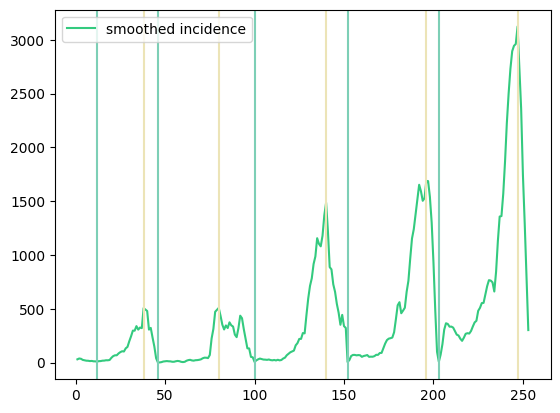

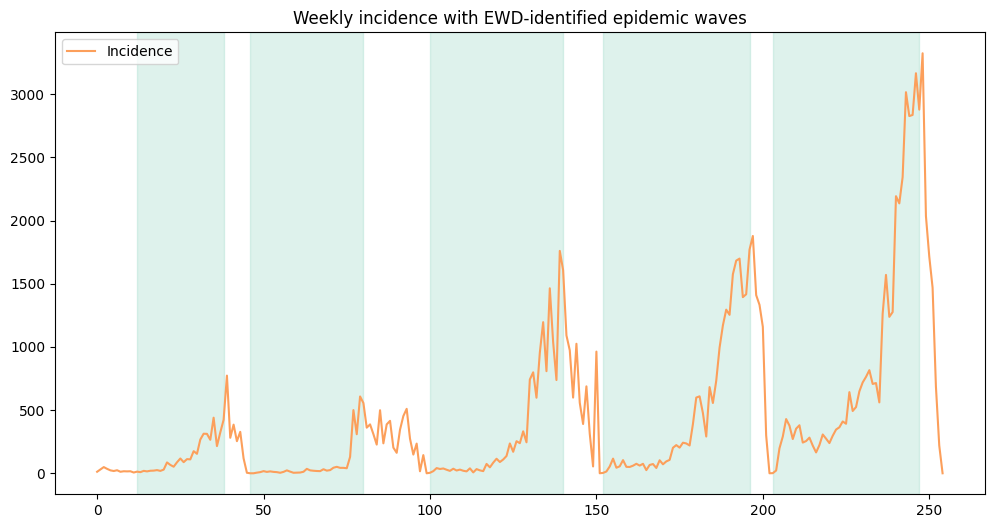

In [31]:
plt.plot(y_smooth, label="smoothed incidence", color = '#33CA7F')

for tmin, tmax in peak_and_mins:
    plt.axvline(tmin, color="#7DCFB6")
    plt.axvline(tmax, color="#ECE4B7")

plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(
    mexico_merged['dengue_total'].values,
    color='#FC9F5B',
    label='Incidence'
)

for tmin, tmax in peak_and_mins:
    ax.axvspan(tmin, tmax, color='#7DCFB6', alpha=0.25)

ax.set_title("Weekly incidence with EWD-identified epidemic waves")
ax.legend()
plt.show()




# Ensemble Label

Label A is used Transmission intensity is increasing relative to the recent past. Label B is the system is in a sustained high-incidence regime distinct from endemic noise.

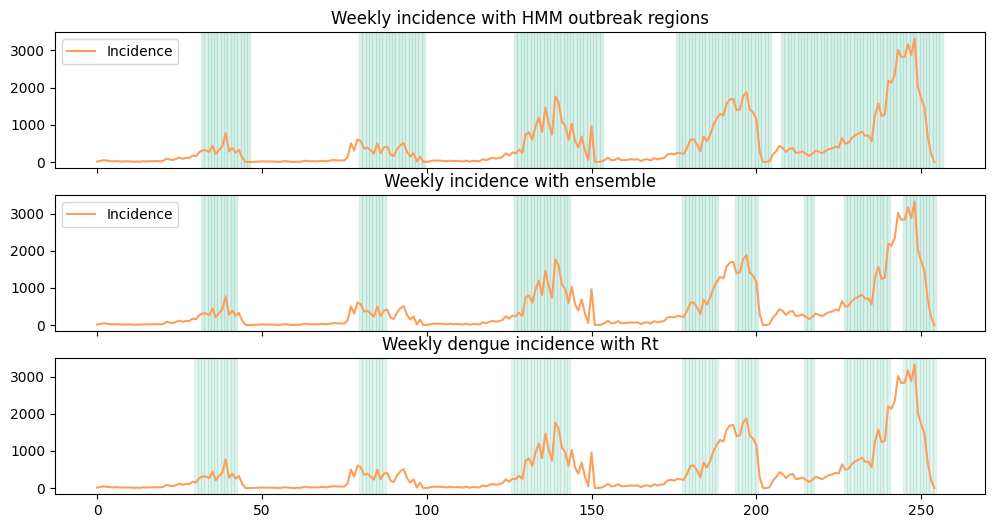

In [67]:
mexico_merged["ensemble_raw"] = (
    (mexico_merged["Rt_outbreak"] == 1) &
    (mexico_merged["HMM2_outbreak_tight"] == 1)
).astype(int)

import numpy as np
import pandas as pd

def remove_short_runs(binary: pd.Series, min_len: int) -> pd.Series:
    """Remove runs of 1s shorter than min_len."""
    x = binary.astype(int).values
    out = x.copy()

    # run-length encoding via change points
    changes = np.flatnonzero(np.diff(np.r_[0, x, 0]) != 0)
    # runs are [changes[0]:changes[1]], [changes[2]:changes[3]], ...
    for start, end in zip(changes[0::2], changes[1::2]):
        if x[start] == 1 and (end - start) < min_len:
            out[start:end] = 0
    return pd.Series(out, index=binary.index)

def fill_short_gaps(binary: pd.Series, max_gap: int) -> pd.Series:
    """Fill gaps of 0s between 1s if the gap length <= max_gap."""
    x = binary.astype(int).values
    out = x.copy()
    changes = np.flatnonzero(np.diff(np.r_[0, x, 0]) != 0)

    # identify 0-runs and fill small ones that are sandwiched by 1s
    for start, end in zip(changes[0::2], changes[1::2]):
        if x[start] == 0 and (end - start) <= max_gap:
            # check sandwich: before start and after end are 1 (within bounds)
            if start > 0 and end < len(x) and x[start-1] == 1 and x[end] == 1:
                out[start:end] = 1
    return pd.Series(out, index=binary.index)

ens = mexico_merged["ensemble_raw"]

ens = remove_short_runs(ens, min_len=3)
ens = fill_short_gaps(ens, max_gap=1)
ens = remove_short_runs(ens, min_len=3)  # run again after gap-fill

mexico_merged["ensemble_outbreak"] = ens.astype(int)

#i notice that the HMM is too lagged and causes issues downstream when we try to find the overlap of the outbreak start.  so we shift it backwards
HMM_shift = 3 # choose a small shift
mexico_merged["HMM_shifted"] = (
    mexico_merged["HMM2_outbreak_tight"]
    .shift(-HMM_shift)
    .fillna(0)
    .astype(int)
)

#reocmpute ensemble with shifted
mexico_merged["ensemble_outbreak"] = (
    (mexico_merged["Rt_outbreak"] == 1) &
    (mexico_merged["HMM_shifted"] == 1)
).astype(int)


# ---- Incidence plot ----

fig, ax = plt.subplots(3,1, figsize=(12,6), sharex=True)

# ---- Incidence plot ----
ax[0].plot(
    mexico_merged['dengue_total'].values,
    color='#FC9F5B',
    label='Incidence'
)

for i in mexico_merged.index[mexico_merged["HMM_shifted"] == 1]:
    ax[0].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.25)

ax[0].set_title("Weekly incidence with HMM outbreak regions")
ax[0].legend()


ax[1].plot(
    mexico_merged['dengue_total'].values,
    color='#FC9F5B',
    label='Incidence'
)

for i in mexico_merged.index[mexico_merged["ensemble_outbreak"] == 1]:
    ax[1].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.25)


ax[1].set_title("Weekly incidence with ensemble")
ax[1].legend()

ax[2].plot(mexico_merged['dengue_total'].values, label='Incidence', color = '#FC9F5B')
for i in mexico_merged.index[mexico_merged['Rt_outbreak'] == 1]:
    ax[2].axvspan(i-0.5, i+0.5, color='#7DCFB6', alpha=0.2)
# ax[0].set_xlim(6,10)
# ax[0].set_ylim(0,100)
ax[2].set_title('Weekly dengue incidence with Rt')
plt.show()

